In [3]:
!pip3 install transformers

In [4]:
from transformers import OpenAIGPTConfig, OpenAIGPTModel

In [5]:
configuration = OpenAIGPTConfig()

In [6]:
model = OpenAIGPTModel(configuration)

In [7]:
configuration = model.config

In [8]:
from transformers import pipeline

In [9]:
classifier = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


D:\Users\L03517927\Anaconda3\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in D:\Users\L03517927\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Xformers is not installed correctly. If you want to use memorry_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [13]:
classifier('We are very happy to show you the 🤗 Transformers library.')

[{'label': 'POSITIVE', 'score': 0.9997795224189758}]

In [ ]:

## Yann LeCun tweet
## https://twitter.com/ylecun/status/1659172655663030272


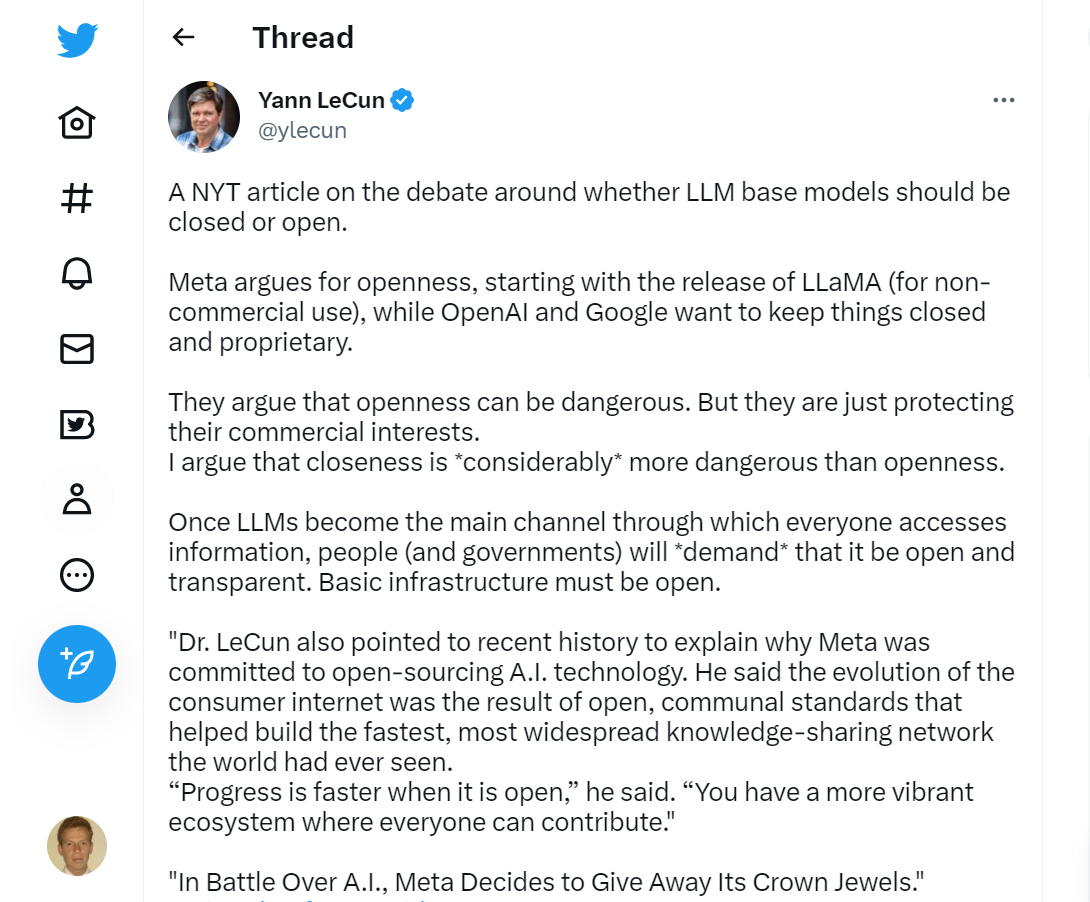

In [18]:
classifier('A NYT article on the debate around whether LLM base models should be closed or open.\
Meta argues for openness, starting with the release of LLaMA (for non-commercial use),\
while OpenAI and Google want to keep things closed and proprietary. \
They argue that openness can be dangerous. But they are just protecting their commercial interests.\
I argue that closeness is *considerably* more dangerous than openness.\
Once LLMs become the main channel through which everyone accesses information, people (and governments)\
will *demand* that it be open and transparent. Basic infrastructure must be open.\
"Dr. LeCun also pointed to recent history to explain why Meta was committed to open-sourcing A.I. technology.\
He said the evolution of the consumer internet was the result of open,\
communal standards that helped build the fastest, most widespread knowledge-sharing network the world had ever seen.\
“Progress is faster when it is open,” he said. “You have a more vibrant ecosystem where everyone can contribute."\
"In Battle Over A.I., Meta Decides to Give Away Its Crown Jewels." ')

[{'label': 'POSITIVE', 'score': 0.6525721549987793}]

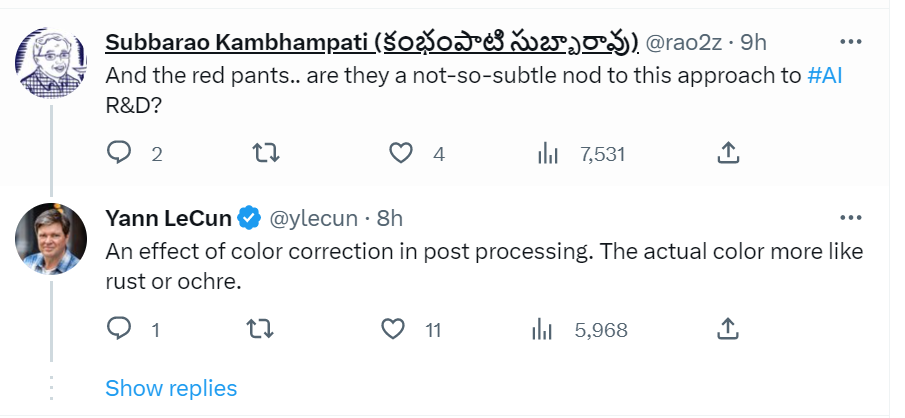

In [17]:
classifier('And the red pants.. are they a not-so-subtle nod to this approach to #AI R&D?.')

[{'label': 'NEGATIVE', 'score': 0.9992475509643555}]

In [16]:
classifier('An effect of color correction in post processing. The actual color more like rust or ochre.')

[{'label': 'NEGATIVE', 'score': 0.9895176291465759}]

In [ ]:
# How to build a API link
# https://www.nocode.mba/ai-app-course?twclid=2-2tr0ztohhfvcxu0ibfzsp7h2a
# This cost 

In [23]:
!pip install pandoc


  Created wheel for pandoc: filename=pandoc-2.3-py3-none-any.whl size=33289 sha256=197e6cc22e860c6aa0aca786412b393fce32a2cb498ef59ce43c25835222874a
  Stored in directory: d:\users\l03517927\appdata\local\pip\cache\wheels\69\e6\a1\1daa96d919c9e09a71473649b717b8da286f3f8d7719d1cfc5
Successfully built pandoc


In [ ]:
## Extractive Question Answering

In [31]:
from transformers import pipeline

In [32]:
nlp = pipeline("question-answering")

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [33]:
context = r"""
Extractive Question Answering is the task of extracting an answer from a text given a question. An example of a
question answering dataset is the SQuAD dataset, which is entirely based on that task. If you would like to fine-tune
a model on a SQuAD task, you may leverage the examples/question-answering/run_squad.py script.
"""

In [34]:
result = nlp(question="What is extractive question answering?", context=context)

In [35]:
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

Answer: 'the task of extracting an answer from a text given a question', score: 0.6226, start: 34, end: 95


In [36]:
result = nlp(question="What is a good example of a question answering dataset?", context=context)

In [37]:
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

Answer: 'SQuAD dataset', score: 0.5053, start: 147, end: 160


In [38]:
from transformers import AutoTokenizer, AutoModelForQuestionAnswering
import torch

In [39]:
tokenizer = AutoTokenizer.from_pretrained("bert-large-uncased-whole-word-masking-finetuned-squad")
model = AutoModelForQuestionAnswering.from_pretrained("bert-large-uncased-whole-word-masking-finetuned-squad", return_dict=True)

In [40]:
text = r"""
🤗 Transformers (formerly known as pytorch-transformers and pytorch-pretrained-bert) provides general-purpose
architectures (BERT, GPT-2, RoBERTa, XLM, DistilBert, XLNet…) for Natural Language Understanding (NLU) and Natural
Language Generation (NLG) with over 32+ pretrained models in 100+ languages and deep interoperability between
TensorFlow 2.0 and PyTorch.
"""

In [41]:
questions = [
    "How many pretrained models are available in 🤗 Transformers?",
    "What does 🤗 Transformers provide?",
    "🤗 Transformers provides interoperability between which frameworks?",
]

In [53]:
for question in questions:
    inputs = tokenizer(question, text, add_special_tokens=True, return_tensors="pt")
    input_ids = inputs["input_ids"].tolist()[0]
    
    text_tokens = tokenizer.convert_ids_to_tokens(input_ids)
    answer_start_scores, answer_end_scores = model(**inputs, return_dict=False)
    
    print(type(answer_start_scores))
    answer_start = torch.argmax(answer_start_scores)    # Get the most likely beginning of answer with the argmax of the score
    answer_end = torch.argmax(answer_end_scores) + 1  # Get the most likely end of answer with the argmax of the score
    
    answer = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(input_ids[answer_start:answer_end]))
    
    print(f"Question: {question}")
    print(f"Answer: {answer}")

<class 'torch.Tensor'>
Question: How many pretrained models are available in 🤗 Transformers?
Answer: over 32 +
<class 'torch.Tensor'>
Question: What does 🤗 Transformers provide?
Answer: general - purpose architectures
<class 'torch.Tensor'>
Question: 🤗 Transformers provides interoperability between which frameworks?
Answer: tensorflow 2. 0 and pytorch


In [ ]:

# https://arxiv.org/abs/1706.03762
# All you need is attention.


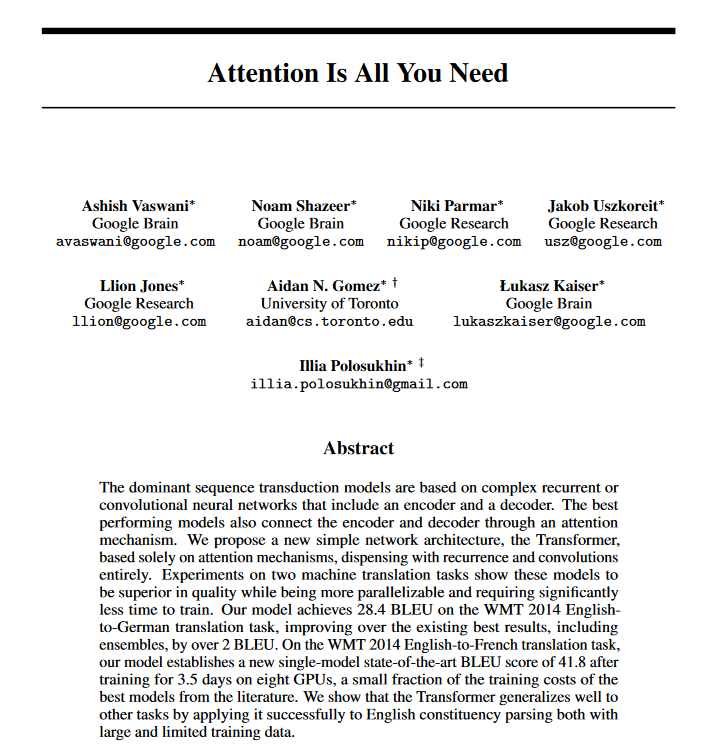

In [80]:
text = r"""
Background.
The goal of reducing sequential computation also forms the foundation of the Extended Neural GPU
[16 ], ByteNet [ 18 ] and ConvS2S [ 9], all of which use convolutional neural networks as basic building
block, computing hidden representations in parallel for all input and output positions. In these models,
the number of operations required to relate signals from two arbitrary input or output positions grows
in the distance between positions, linearly for ConvS2S and logarithmically for ByteNet. This makes
it more difficult to learn dependencies between distant positions [12 ]. In the Transformer this is
reduced to a constant number of operations, albeit at the cost of reduced effective resolution due
to averaging attention-weighted positions, an effect we counteract with Multi-Head Attention as
described in section 3.2.
Self-attention, sometimes called intra-attention is an attention mechanism relating different positions
of a single sequence in order to compute a representation of the sequence. Self-attention has been
used successfully in a variety of tasks including reading comprehension, abstractive summarization,
textual entailment and learning task-independent sentence representations [4, 27, 28, 22].
End-to-end memory networks are based on a recurrent attention mechanism instead of sequence-
aligned recurrence and have been shown to perform well on simple-language question answering and
language modeling tasks [34].

Attention
An attention function can be described as mapping a query and a set of key-value pairs to an output,
where the query, keys, values, and output are all vectors. The output is computed as a weighted sum
of the values, where the weight assigned to each value is computed by a compatibility function of the
query with the corresponding key.
Scaled Dot-Product Attention
We call our particular attention "Scaled Dot-Product Attention" (Figure 2). The input consists of
queries and keys of dimension dk, and values of dimension dv . We compute the dot products of the
query with all keys, divide each by √dk, and apply a softmax function to obtain the weights on the
values.

"""

In [85]:
questions = [
    "Which one is an attention mechanism relating different positions of a single sequences?",
    "What is attention?",
    "What is Scaled Dot-Product Attention?",
    "In What consists Scaled Dot-Product Attention?",
]

In [86]:
for question in questions:
    inputs = tokenizer(question, text, add_special_tokens=True, return_tensors="pt")
    input_ids = inputs["input_ids"].tolist()[0]
    
    text_tokens = tokenizer.convert_ids_to_tokens(input_ids)
    answer_start_scores, answer_end_scores = model(**inputs, return_dict=False)
    
    print(type(answer_start_scores))
    answer_start = torch.argmax(answer_start_scores)    # Get the most likely beginning of answer with the argmax of the score
    answer_end = torch.argmax(answer_end_scores) + 1  # Get the most likely end of answer with the argmax of the score
    
    answer = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(input_ids[answer_start:answer_end]))
    
    print(f"Question: {question}")
    print(f"Answer: {answer}")

<class 'torch.Tensor'>
Question: Which one is an attention mechanism relating different positions of a single sequences?
Answer: self - attention
<class 'torch.Tensor'>
Question: What is attention?
Answer: mapping a query and a set of key - value pairs to an output
<class 'torch.Tensor'>
Question: What is Scaled Dot-Product Attention?
Answer: our particular attention
<class 'torch.Tensor'>
Question: In What consists Scaled Dot-Product Attention?
Answer: queries and keys of dimension dk, and values of dimension dv


In [93]:
text = r"""
Why Self-Attention.
In this section we compare various aspects of self-attention layers to the recurrent and convolutional
layers commonly used for mapping one variable-length sequence of symbol representations
(x1, ..., xn) to another sequence of equal length (z1, ..., zn), with xi , zi ∈ R d, such as a hidden
layer in a typical sequence transduction encoder or decoder. Motivating our use of self-attention we
consider three desiderata.
One is the total computational complexity per layer. Another is the amount of computation that can
be parallelized, as measured by the minimum number of sequential operations required.
The third is the path length between long-range dependencies in the network. Learning long-range
dependencies is a key challenge in many sequence transduction tasks. One key factor affecting the
ability to learn such dependencies is the length of the paths forward and backward signals have to
traverse in the network. The shorter these paths between any combination of positions in the input
and output sequences, the easier it is to learn long-range dependencies [12]. Hence we also compare
the maximum path length between any two input and output positions in networks composed of the
different layer types.
As noted in Table 1, a self-attention layer connects all positions with a constant number of sequentially
executed operations, whereas a recurrent layer requires O(n) sequential operations. In terms of
computational complexity, self-attention layers are faster than recurrent layers when the sequence
length n is smaller than the representation dimensionality d, which is most often the case with
sentence representations used by state-of-the-art models in machine translations, such as word-piece
[38] and byte-pair [31] representations. 
"""

In [100]:
questions = [
    "Are self-attention layers faster than recurrent layers?",
]

In [101]:
for question in questions:
    inputs = tokenizer(question, text, add_special_tokens=True, return_tensors="pt")
    input_ids = inputs["input_ids"].tolist()[0]
    
    text_tokens = tokenizer.convert_ids_to_tokens(input_ids)
    answer_start_scores, answer_end_scores = model(**inputs, return_dict=False)
    
    print(type(answer_start_scores))
    answer_start = torch.argmax(answer_start_scores)    # Get the most likely beginning of answer with the argmax of the score
    answer_end = torch.argmax(answer_end_scores) + 1  # Get the most likely end of answer with the argmax of the score
    
    answer = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(input_ids[answer_start:answer_end]))
    
    print(f"Question: {question}")
    print(f"Answer: {answer}")

<class 'torch.Tensor'>
Question: Are self-attention layers faster than recurrent layers?
Answer: self - attention layers are faster than recurrent layers when the sequence length n is smaller than the representation dimensionality d


In [102]:
text = r"""
Conclusion
In this work, we presented the Transformer, the first sequence transduction model based entirely on
attention, replacing the recurrent layers most commonly used in encoder-decoder architectures with
multi-headed self-attention.
For translation tasks, the Transformer can be trained significantly faster than architectures based
on recurrent or convolutional layers. On both WMT 2014 English-to-German and WMT 2014
English-to-French translation tasks, we achieve a new state of the art. In the former task our best
model outperforms even all previously reported ensembles.
We are excited about the future of attention-based models and plan to apply them to other tasks. We
plan to extend the Transformer to problems involving input and output modalities other than text and
to investigate local, restricted attention mechanisms to efficiently handle large inputs and outputs
such as images, audio and video. Making generation less sequential is another research goals of ours.
The code we used to train and evaluate our models is available at https://github.com/
tensorflow/tensor2tensor. 
"""

In [114]:
questions = [
    "Where is aviable the code model to train and evaluate?",
    "Wich were the translation task used in this research work?",
]

In [115]:
for question in questions:
    inputs = tokenizer(question, text, add_special_tokens=True, return_tensors="pt")
    input_ids = inputs["input_ids"].tolist()[0]
    
    text_tokens = tokenizer.convert_ids_to_tokens(input_ids)
    answer_start_scores, answer_end_scores = model(**inputs, return_dict=False)
    
    print(type(answer_start_scores))
    answer_start = torch.argmax(answer_start_scores)    # Get the most likely beginning of answer with the argmax of the score
    answer_end = torch.argmax(answer_end_scores) + 1  # Get the most likely end of answer with the argmax of the score
    
    answer = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(input_ids[answer_start:answer_end]))
    
    print(f"Question: {question}")
    print(f"Answer: {answer}")

<class 'torch.Tensor'>
Question: Where is aviable the code model to train and evaluate?
Answer: https : / / github. com / tensorflow / tensor2tensor
<class 'torch.Tensor'>
Question: Wich were the translation task used in this research work?
Answer: wmt 2014 english - to - german and wmt 2014 english - to - french


In [ ]:
## Text Generation.  

In [116]:
from transformers import pipeline

In [117]:
text_generator = pipeline("text-generation")

No model was supplied, defaulted to gpt2 and revision 6c0e608 (https://huggingface.co/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [118]:
print(text_generator("As far as I am concerned, I will", max_length=50, do_sample=False))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'As far as I am concerned, I will be the first to admit that I am not a fan of the idea of a "free market." I think that the idea of a free market is a bit of a stretch. I think that the idea'}]


In [119]:
from transformers import AutoModelWithLMHead, AutoTokenizer

In [120]:
model = AutoModelWithLMHead.from_pretrained("xlnet-base-cased", return_dict=True)

D:\Users\L03517927\Anaconda3\lib\site-packages\transformers\models\auto\modeling_auto.py:1352: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(


In [121]:
tokenizer = AutoTokenizer.from_pretrained("xlnet-base-cased")

In [122]:
PADDING_TEXT = """In 1991, the remains of Russian Tsar Nicholas II and his family
(except for Alexei and Maria) are discovered.
The voice of Nicholas's young son, Tsarevich Alexei Nikolaevich, narrates the
remainder of the story. 1883 Western Siberia,
a young Grigori Rasputin is asked by his father and a group of men to perform magic.
Rasputin has a vision and denounces one of the men as a horse thief. Although his
father initially slaps him for making such an accusation, Rasputin watches as the
man is chased outside and beaten. Twenty years later, Rasputin sees a vision of
the Virgin Mary, prompting him to become a priest. Rasputin quickly becomes famous,
with people, even a bishop, begging for his blessing. <eod> </s> <eos>"""

In [123]:
prompt = "Today the weather is really nice and I am planning on "
inputs = tokenizer.encode(PADDING_TEXT + prompt, add_special_tokens=False, return_tensors="pt")

prompt_length = len(tokenizer.decode(inputs[0], skip_special_tokens=True, clean_up_tokenization_spaces=True))
outputs = model.generate(inputs, max_length=250, do_sample=True, top_p=0.95, top_k=60)
generated = prompt + tokenizer.decode(outputs[0])[prompt_length:]


In [124]:
print(generated)

Today the weather is really nice and I am planning on anning on enjoying it! That's so nice! It feels like I live in a foreign place that I don't know, but I love everything about it. I don't think it's as nice as others, I don't think the weather is as good or as great. I think it's that way a lot of times, but it'


In [ ]:
## Summarization

In [125]:
from transformers import pipeline

In [126]:
summarizer = pipeline("summarization")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [127]:
>>> ARTICLE = """ New York (CNN)When Liana Barrientos was 23 years old, she got married in Westchester County, New York.
A year later, she got married again in Westchester County, but to a different man and without divorcing her first husband.
Only 18 days after that marriage, she got hitched yet again. Then, Barrientos declared "I do" five more times, sometimes only within two weeks of each other.
In 2010, she married once more, this time in the Bronx. In an application for a marriage license, she stated it was her "first and only" marriage.
Barrientos, now 39, is facing two criminal counts of "offering a false instrument for filing in the first degree," referring to her false statements on the
2010 marriage license application, according to court documents.
Prosecutors said the marriages were part of an immigration scam.
On Friday, she pleaded not guilty at State Supreme Court in the Bronx, according to her attorney, Christopher Wright, who declined to comment further.
After leaving court, Barrientos was arrested and charged with theft of service and criminal trespass for allegedly sneaking into the New York subway through an emergency exit, said Detective
Annette Markowski, a police spokeswoman. In total, Barrientos has been married 10 times, with nine of her marriages occurring between 1999 and 2002.
All occurred either in Westchester County, Long Island, New Jersey or the Bronx. She is believed to still be married to four men, and at one time, she was married to eight men at once, prosecutors say.
Prosecutors said the immigration scam involved some of her husbands, who filed for permanent residence status shortly after the marriages.
Any divorces happened only after such filings were approved. It was unclear whether any of the men will be prosecuted.
The case was referred to the Bronx District Attorney\'s Office by Immigration and Customs Enforcement and the Department of Homeland Security\'s
Investigation Division. Seven of the men are from so-called "red-flagged" countries, including Egypt, Turkey, Georgia, Pakistan and Mali.
Her eighth husband, Rashid Rajput, was deported in 2006 to his native Pakistan after an investigation by the Joint Terrorism Task Force.
If convicted, Barrientos faces up to four years in prison.  Her next court appearance is scheduled for May 18.
"""

In [128]:
print(summarizer(ARTICLE, max_length=130, min_length=30, do_sample=False))

[{'summary_text': ' Liana Barrientos, 39, is charged with two counts of "offering a false instrument for filing in the first degree" In total, she has been married 10 times, with nine of her marriages occurring between 1999 and 2002 . At one time, she was married to eight men at once, prosecutors say .'}]


In [131]:
ARTICLE = """ 
There's a broader social context that informs a lot of our language use which these models are,
at least not immediately, sensitive to or aware of. It's not clear how to give them information
about the social context in which their language generation and language modeling takes place. 
Another important thing is temporal context. We’re shooting this video at a particular moment
in time when particular facts are true. The models that we have right now were trained on, again,
a snapshot of the internet that stopped at a particular time — for most models that we have now, 
probably a couple of years ago — and they don't know about anything that's happened since then. 
They don't even know at what moment in time they're doing text generation. Figuring out how to provide all 
of those different kinds of contexts is also an interesting question.

Maybe one of the most surprising components here is this phenomenon called in-context learning. 
If I take a small ML [machine learning] dataset and feed it to the model, like a movie review 
and the star rating assigned to the movie by the critic, you give just a couple of examples of these things,
language models generate the ability both to generate plausible sounding movie reviews but also to predict the star ratings.
More generally, if I have a machine learning problem, I have my inputs and my outputs. As you give an input to the model,
you give it one more input and ask it to predict the output, the models can often do this really well.
"""

In [135]:
print(summarizer(ARTICLE, max_length=230, min_length=30, do_sample=False))

[{'summary_text': " The models that we have right now were trained on, again, a snapshot of the internet that stopped at a particular time, and they don't know about anything that's happened since then . There's a broader social context that informs a lot of our language use which these models are, at least not immediately, sensitive to or aware of ."}]
